## Outlier removal Using IQR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:/Python and ML/Dataset/placement.csv")

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
785,6.07,29.0,1
860,7.51,21.0,0
989,6.23,31.0,0
188,5.92,55.0,1
853,7.74,22.0,0


Text(0.5, 1.0, 'Placement Exam Marks Distribution')

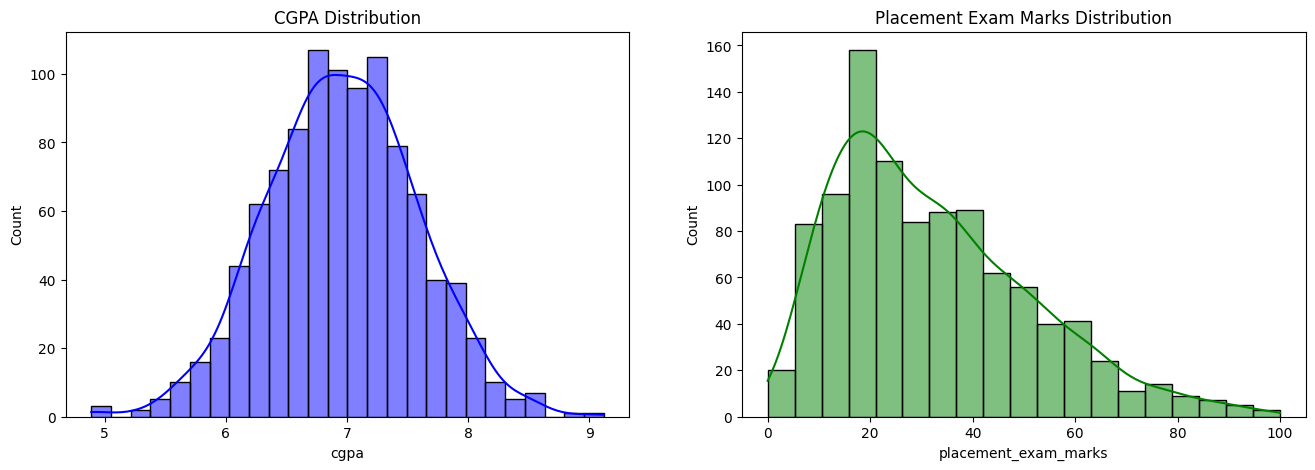

In [5]:
plt.figure(figsize=(16,5))

# CGPA distribution
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, color="blue")
plt.title("CGPA Distribution")

# Placement Exam Marks distribution
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True, color="green")
plt.title("Placement Exam Marks Distribution")


In [6]:
df["placement_exam_marks"].skew()

np.float64(0.8356419499466834)

<Axes: xlabel='placement_exam_marks'>

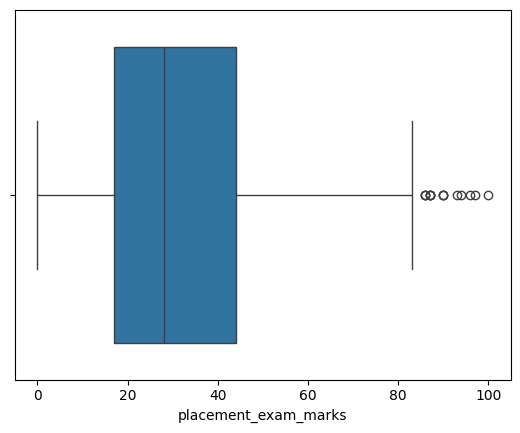

In [8]:
# as it is skewed graph in placement_exam_marks so we can use IQR for removal of Outliers

sns.boxplot(x = df["placement_exam_marks"])

In [9]:
percentile25 = df["placement_exam_marks"].quantile(0.25)
percentile75 = df["placement_exam_marks"].quantile(0.75)


In [10]:
percentile75 

np.float64(44.0)

In [11]:
iqr = percentile75 - percentile25

In [12]:
iqr

np.float64(27.0)

In [13]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [14]:
print("upper_limit ",upper_limit )
print("upper_limit ",lower_limit )

upper_limit  84.5
upper_limit  -23.5


### Finding Outliers

In [16]:
df[df["placement_exam_marks"]>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [17]:

df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming

In [21]:
new_df = df[(df["placement_exam_marks"]<upper_limit) & (df["placement_exam_marks"]>lower_limit)]

In [22]:

new_df.shape

(985, 3)

C:\Users\HP\AppData\Local\Temp\ipykernel_36352\554880325.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


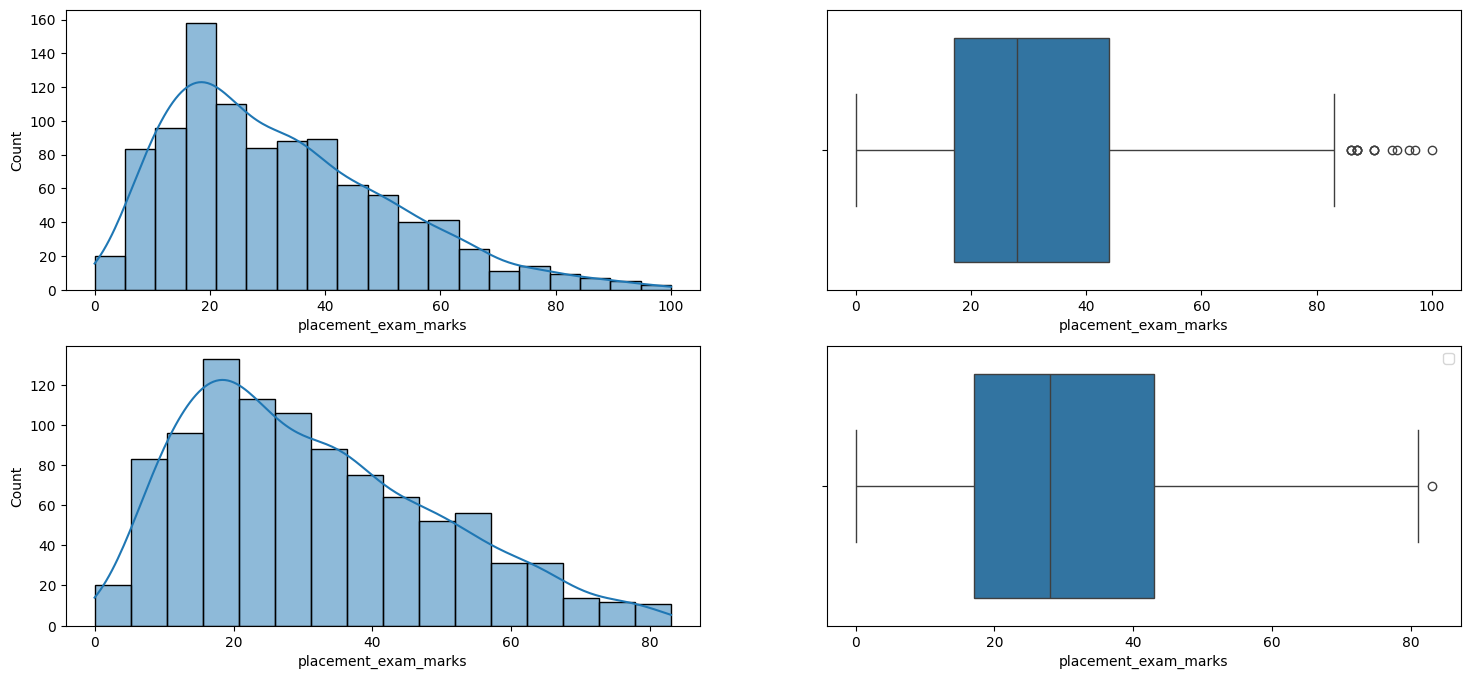

In [ ]:
# comparing

plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.histplot(df["placement_exam_marks"], kde=True)

plt.subplot(2,2,2)
sns.boxplot( x = df["placement_exam_marks"])


plt.subplot(2,2,3)
sns.histplot(new_df["placement_exam_marks"], kde=True)

plt.subplot(2,2,4)
sns.boxplot(x = new_df["placement_exam_marks"])


plt.show()

### Capping

In [28]:
new_df_cap = df.copy()

In [30]:
new_df_cap["placement_exam_marks"] = np.where(
    new_df_cap["placement_exam_marks"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["placement_exam_marks"] < lower_limit,
        lower_limit,
        new_df_cap["placement_exam_marks"]
    )
)

In [31]:
new_df_cap.shape

(1000, 3)

C:\Users\HP\AppData\Local\Temp\ipykernel_36352\959515735.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP\AppData\Local\Temp\ipykernel_36352\959515735.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


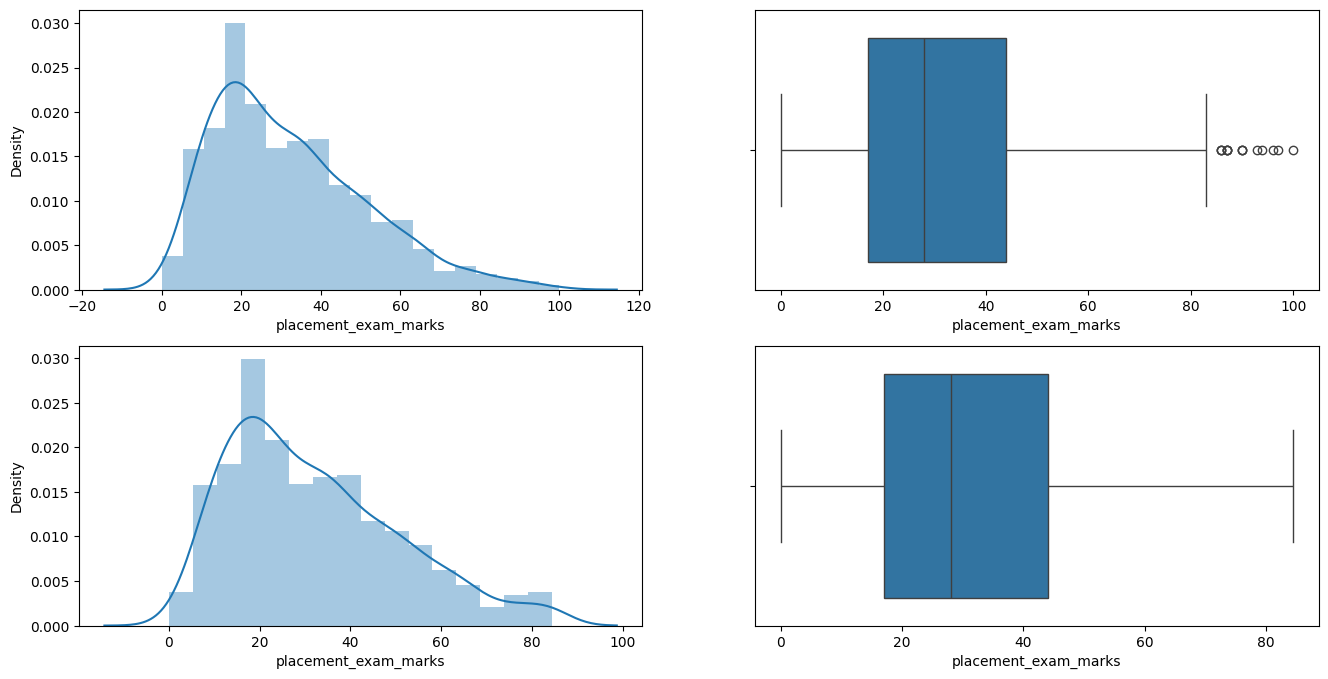

In [33]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x = new_df_cap['placement_exam_marks'])

plt.show()